# Specific Heat of Solids

It is the rate of change of internal energy of a system with respect to temperature when heat is supplied from outside. The formula for specific heat is given by
*   Dulong Petit law
*   Debye's theory
*   Einstein's theory

## Dulong Petit's law
Classically each atom of the solid is considered to be a harmonic oscillator vibrating independently of other similar harmonic oscillators. According to Equipartition theorem, the total energy of N independent harmonic oscillators in three dimensions for a given gram-mole of the substance is given by
$$E = 3NkT$$. Therefore, by definition specific heat is given by
\begin{align}
C_v = \left. \frac{\partial E}{\partial T}\right \vert_{v}=3Nk = 3R
\end{align}
According to this law the specific heat of solid must be a constant quantity independent of temperature. This is essentially true at high temperature for many solids including metals. 

However, experimental measurements on the specific heat of solid show that at low temperature the specific
heat falls rapidly and approaches to zero at absolute zero temperature. 

## Debye's theory of specific heat
Total energy of phonon:
\begin{equation}
U = 9Nk_BT\left(\frac{T}{T_D}\right)^3\int_{0}^{x_D}\frac{x^4e^xdx}{(e^x-1)^2}
\end{equation}
where $$x_D = T_d/T $$ and $$x=\hbar \omega/k_BT$$ 
The heat capacity:
\begin{equation}
C_v=\frac{\partial U}{\partial T}= 9Nk_B\left(\frac{T}{T_D}\right)^3\int_{0}^{x_D}\frac{x^4e^xdx}{(e^x-1)^2}
\end{equation}
Ref:http://electrons.wikidot.com/debye-model-for-specific-heat

## Debye temperature for certain substance

| Lead  |Silver   |Aluminium   |Diamond   |   
|---|---|---|---|
|105 K   |225 K   |428 K   |2230 K   |   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.integrate import quad

In [2]:
kB = const.k
N  = const.N_A
R  = const.R

Td = 225        # Debye temperature for copper
Te = 240        # Einstein temperature for copper

Text(0, 0.5, 'Specific Heat')

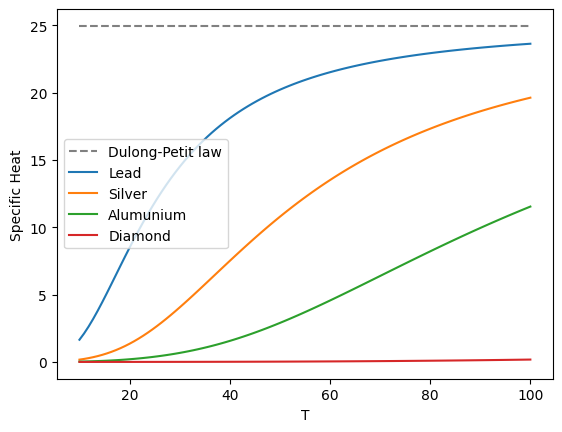

In [3]:
T = np.linspace(10, 100, 100)


# Dulong Petit's law of specific heat
def spheatDP(T):
    return 3*R
spheatDP = np.vectorize(spheatDP)

# Debye's theory of specific heat
def Debye(Td):
    f = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2
    xd = Td/T
    I = [quad(f, 0, xd[i])[0] for i in range(len(T))]
    c = 9*N*kB*(T/Td)**3*I
    return c

Td_Pb = 105
Td_Ag = 225
Td_Al = 428
Td_Diamond = 2230

c_Pb = Debye(Td_Pb)
c_Ag = Debye(Td_Ag)
c_Al = Debye(Td_Al)
c_Diamond = Debye(Td_Diamond)


plt.plot(T, spheatDP(T), linestyle='--', color='gray', label="Dulong-Petit law")
plt.plot(T, c_Pb, label="Lead")
plt.plot(T, c_Ag, label="Silver")
plt.plot(T, c_Al, label="Alumunium")
plt.plot(T, c_Diamond, label="Diamond")
plt.legend()
plt.xlabel("T")
plt.ylabel("Specific Heat")

Text(0, 0.5, 'Specific Heat ($C_v$)')

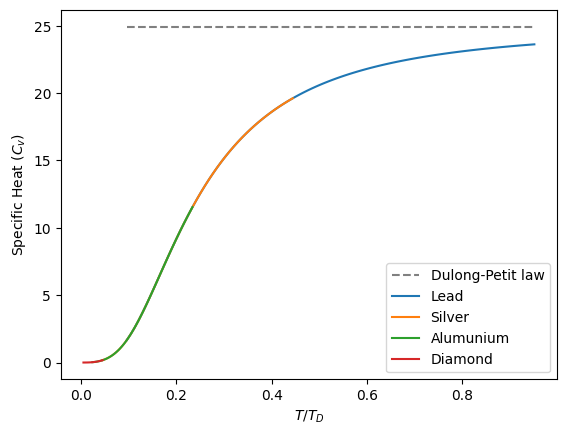

In [4]:
x = T/Td_Pb

plt.plot(x, spheatDP(T), linestyle='--', color='gray', label="Dulong-Petit law")
plt.plot(x, c_Pb, label="Lead")
x = T/Td_Ag
plt.plot(x, c_Ag, label="Silver")
x = T/Td_Al
plt.plot(x, c_Al, label="Alumunium")
x = T/Td_Diamond
plt.plot(x, c_Diamond, label="Diamond")
plt.legend()
plt.xlabel("$T/T_D$")
plt.ylabel("Specific Heat ($C_v$)")